In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_pmip3_ipsl_hist_null.csv', delimiter=",", dtype=float).flatten()
is_plateau = np.genfromtxt('is_plateau.csv', delimiter=",", dtype=float).flatten()
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()

In [3]:
delphi_hist_wrap = ( delphi_hist + np.pi) % (2 * np.pi )
delphi_hist_null_wrap = ( delphi_hist_null + np.pi) % (2 * np.pi )
delphi_green = delphi_hist_wrap[is_plateau==1.0]
delphi_white = delphi_hist_wrap[is_plateau==0.0]

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator

from scipy.stats import truncnorm

def polar_plot(dist, l_):
    # misc params
    N = 50000
    pi = np.pi

    # get histogram
    hc, be = np.histogram(dist, bins=100)
    bc = 0.5 * (be[1:] + be[:-1])

    # set up figure
    fig = pl.figure(figsize=[24, 9.])
    l = 0.10
    b, w, h = 0.125, 0.75, 0.75
    ax = fig.add_axes([l, b, w, h], projection="polar")
    axlabfs, tiklabfs = 14, 12
    major_tiksz, minor_tiksz = 8, 4
    clr = "CadetBlue"
    
    # polar plot
    # ax2.bar(bc, hc, width=np.diff(be), bottom=0.)
    ax.hist(dist, bins=360,
             edgecolor=clr, facecolor=clr, label=l_)
    off = 0.10 * (hc.max() - hc.min())
    ax.set_rorigin(-off)
    ax.grid("on")
    xmajloc = MaxNLocator(nbins=4, integer=True, prune="upper")
    ax.yaxis.set_major_locator(xmajloc)
    ax.set_rlabel_position(0)
    ax.set_frame_on(False)
    ax.set_xticklabels([
                         "0",
                         r"$\dfrac{\pi}{4}$",
                         r"$\dfrac{\pi}{2}$",
                         r"$\dfrac{3\pi}{4}$",
                         r"$\pi$",
                         r"$\dfrac{5\pi}{4}$",
                         r"$\dfrac{3\pi}{2}$",
                         r"$\dfrac{7\pi}{4}$",
                         # r"$2\pi$",
                         ])
    ax.legend()

    for ax in fig.axes:
        ax.tick_params(labelsize=tiklabfs, size=major_tiksz)

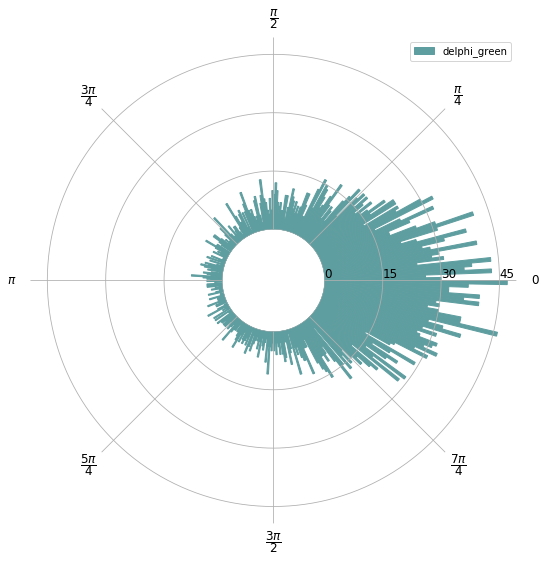

In [5]:
polar_plot(delphi_green,'delphi_green')

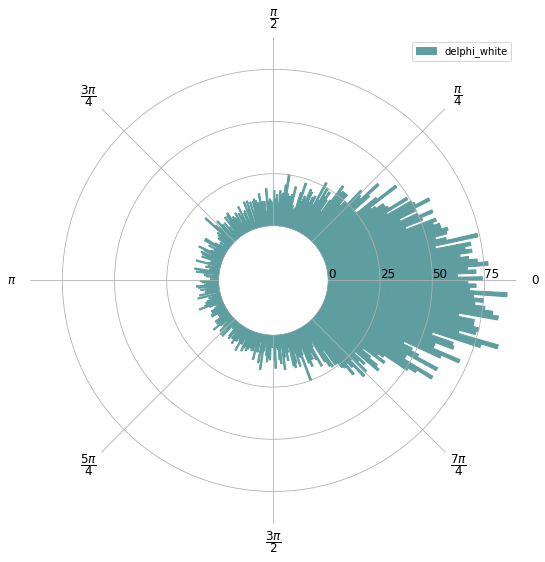

In [6]:
polar_plot(delphi_white,'delphi_white')

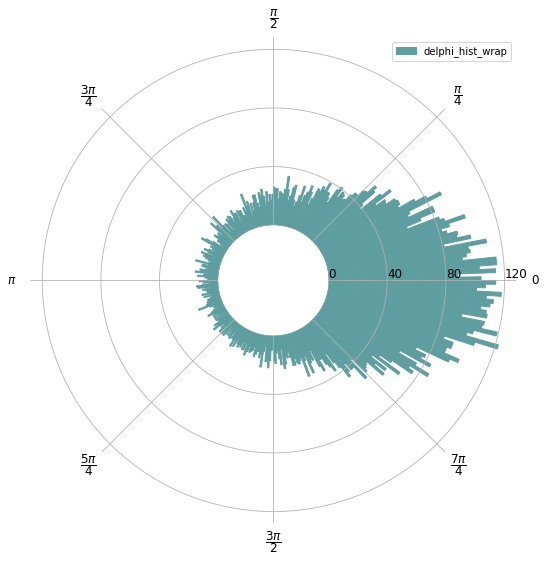

In [7]:
polar_plot(delphi_hist_wrap, 'delphi_hist_wrap')

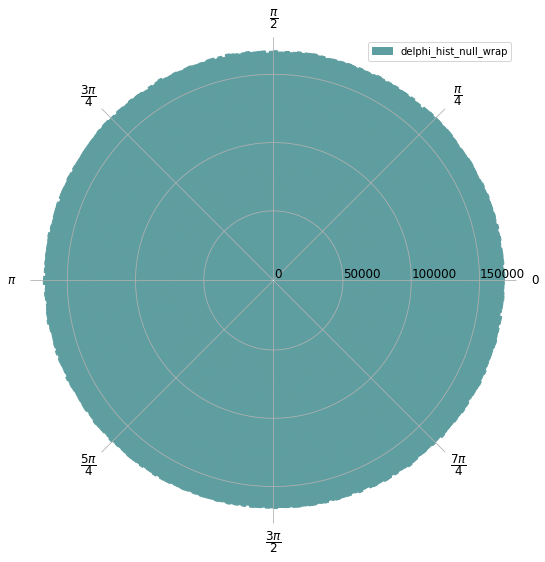

In [8]:
polar_plot(delphi_hist_null_wrap, 'delphi_hist_null_wrap')

In [9]:
delphi_hist_wrap_inst = np.diff(delphi_hist_wrap, n=1)
delphi_hist_null_wrap_inst = np.diff(delphi_hist_null_wrap, n=1)
delphi_green_inst = delphi_hist_wrap_inst[is_plateau[:-1]==1.0]
delphi_white_inst = delphi_hist_wrap_inst[is_plateau[:-1]==0.0]

In [10]:
nino3_data = np.genfromtxt('tas_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_nino3_tseries.csv', delimiter=",", dtype=float).flatten()
ismr_data = np.genfromtxt('pr_Amon_IPSL-CM5A-LR_past1000_r1i1p1_0850_1850_goswami_india_tseries.csv', delimiter=",", dtype=float).flatten()*86400

nino3 = nino3_data - np.mean(nino3_data)
ismr = (ismr_data - np.mean(ismr_data))/np.std(ismr_data)

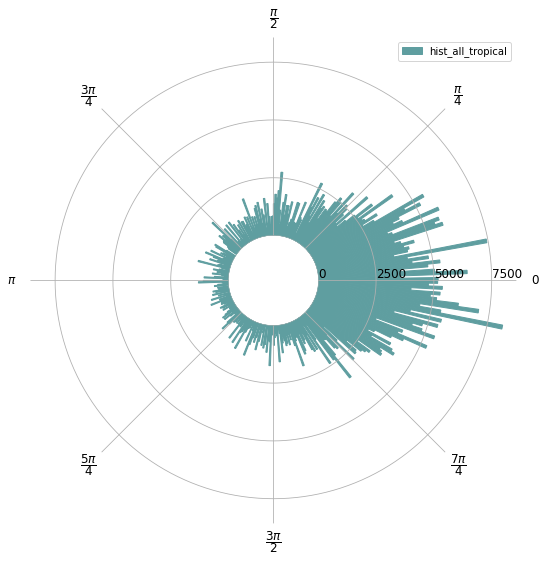

In [11]:
# All Tropical Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

polar_plot(delphi_hist_dist_2, 'hist_all_tropical')

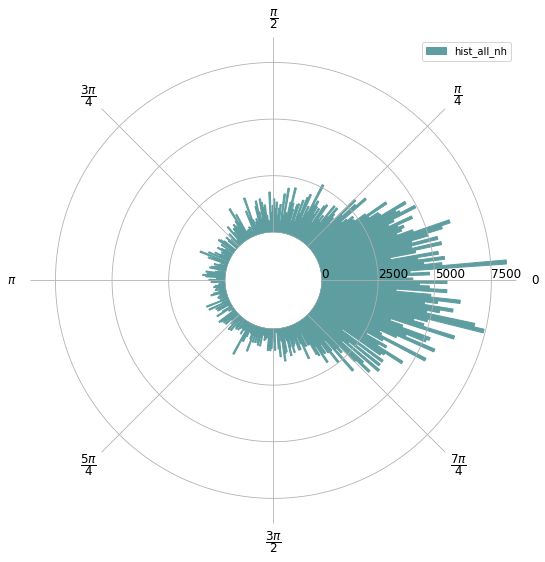

In [12]:
# All NH Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()

polar_plot(delphi_hist_dist_2, 'hist_all_nh')

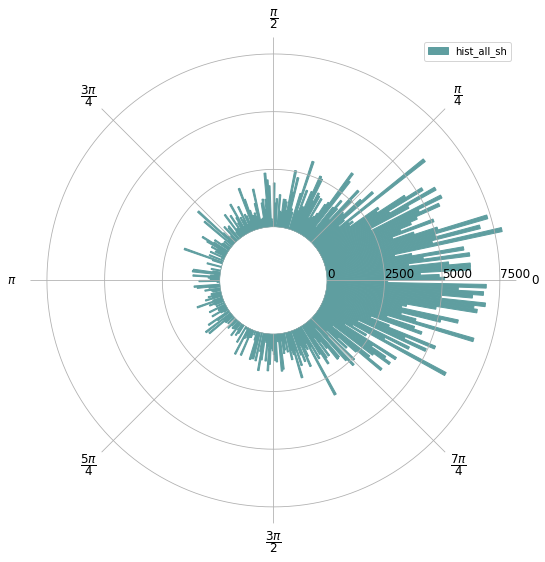

In [13]:
# All SH Eruptions 
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    #if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
    #    continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_sh')

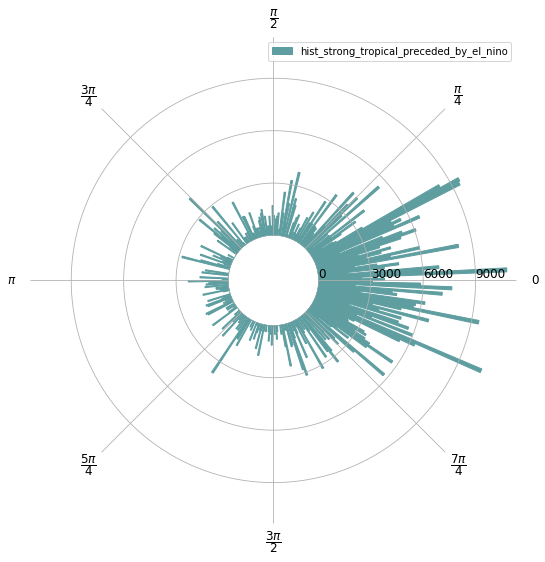

In [14]:
# Strong Tropical Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_strong_tropical_preceded_by_el_nino')

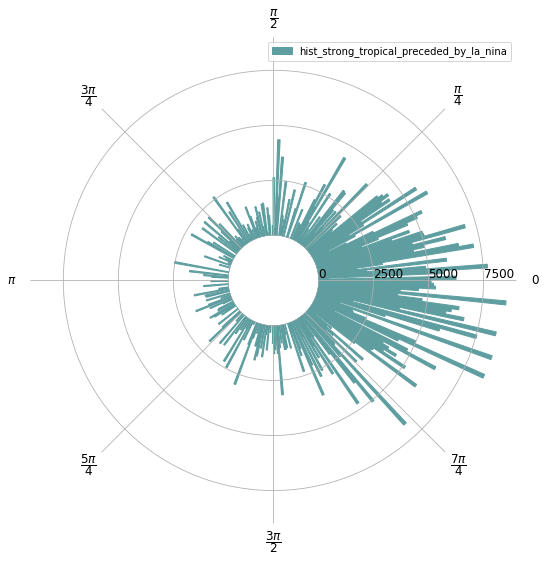

In [15]:
# Strong Tropical Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_strong_tropical_preceded_by_la_nina')

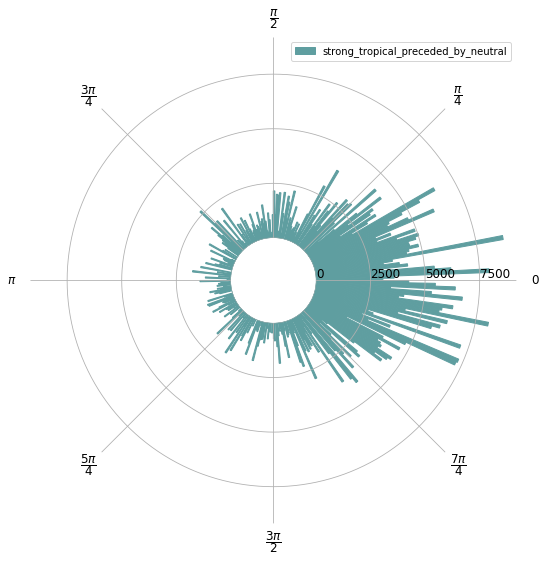

In [16]:
# Strong Tropical Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'strong_tropical_preceded_by_neutral')

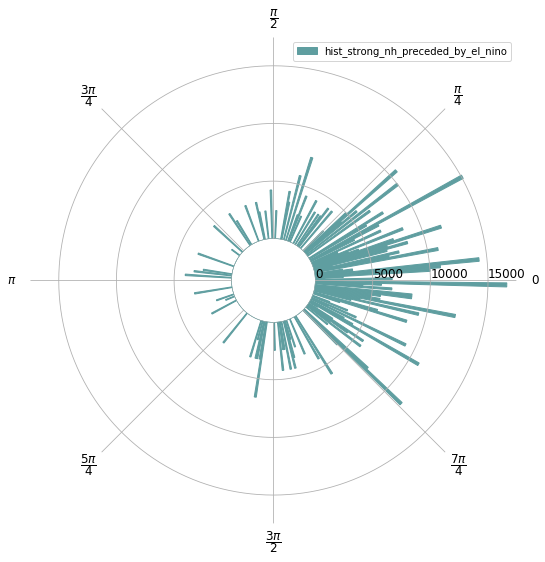

In [17]:
# Strong NH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_strong_nh_preceded_by_el_nino')

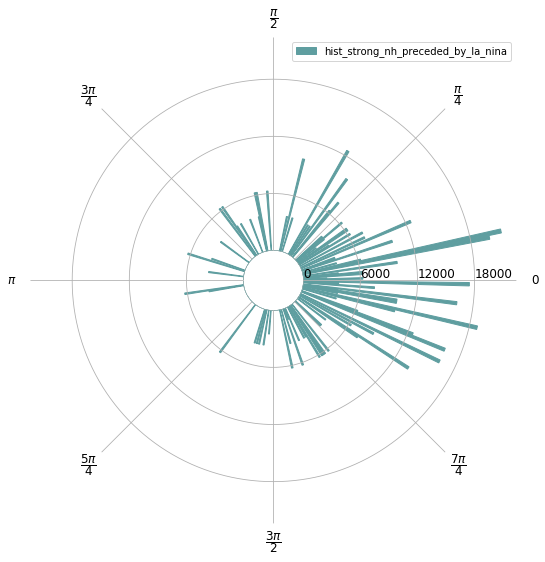

In [18]:
# Strong NH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_strong_nh_preceded_by_la_nina')

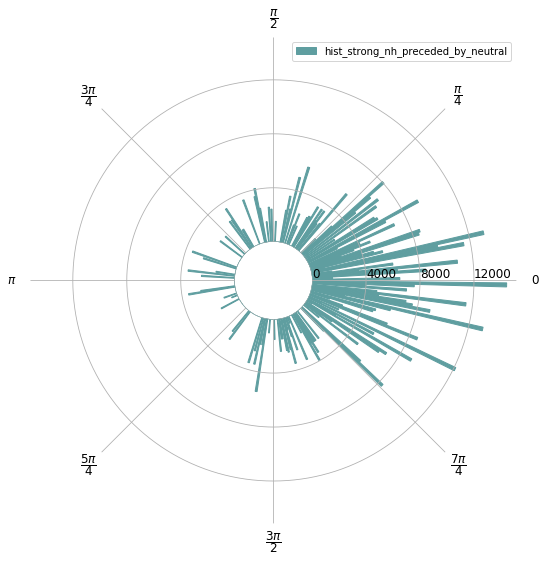

In [19]:
# Strong NH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_strong_nh_preceded_by_neutral')

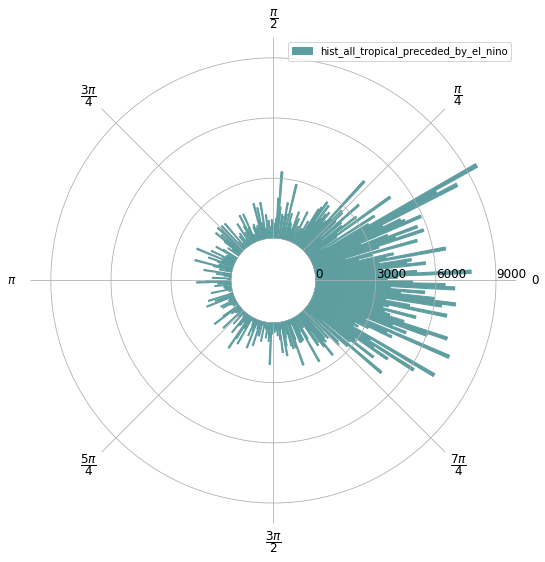

In [20]:
# All Tropical Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_tropical_preceded_by_el_nino')

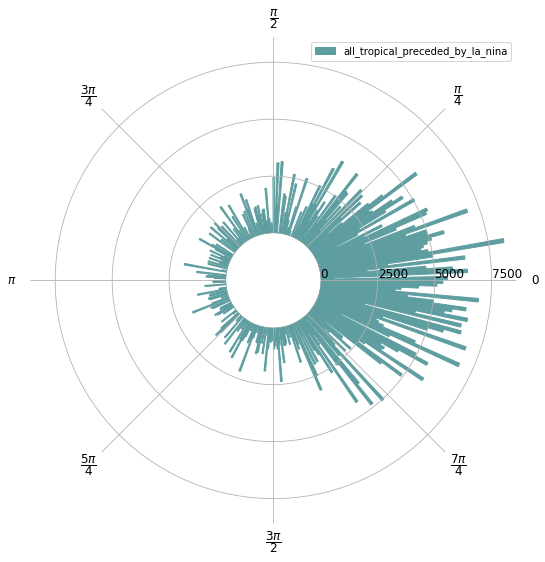

In [21]:
# All Tropical Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'all_tropical_preceded_by_la_nina')

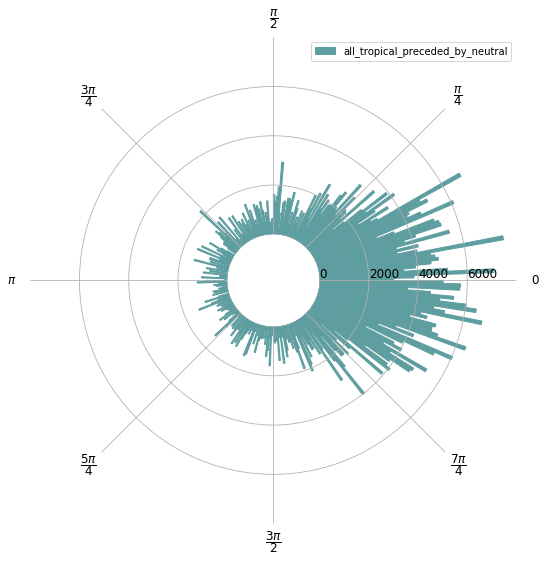

In [22]:
# All Tropical Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'all_tropical_preceded_by_neutral')

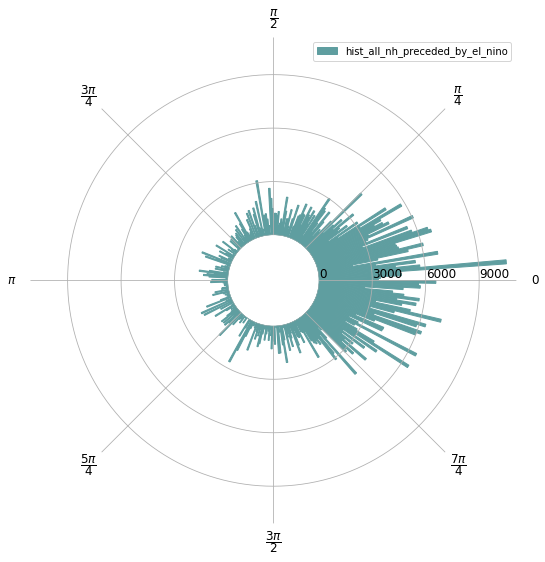

In [23]:
# All NH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_nh_preceded_by_el_nino')

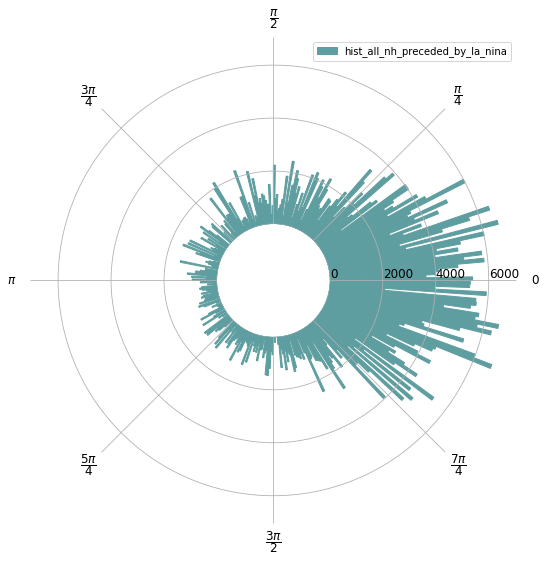

In [24]:
# All NH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_nh_preceded_by_la_nina')

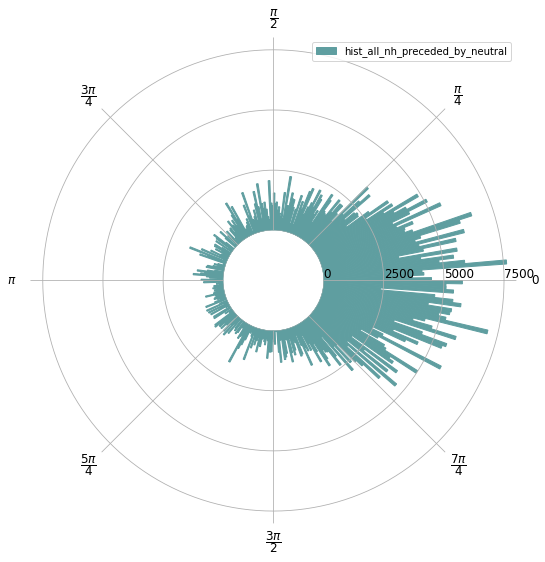

In [25]:
# All NH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 2.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_nh_preceded_by_neutral')

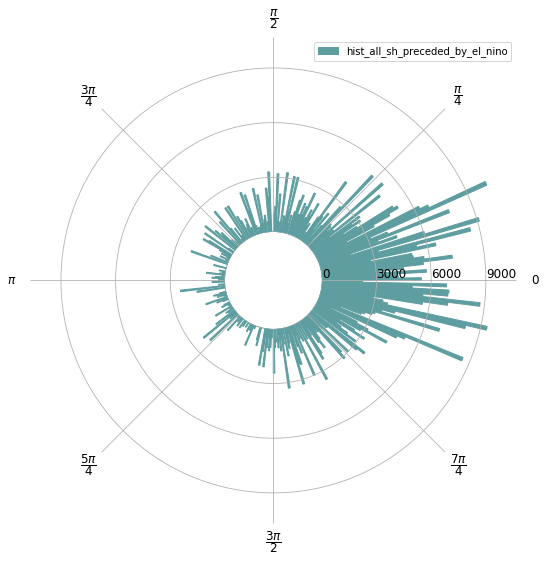

In [26]:
# All SH Eruptions preceded by El Nino conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]])< 0.5: # El Nino in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_sh_preceded_by_el_nino')

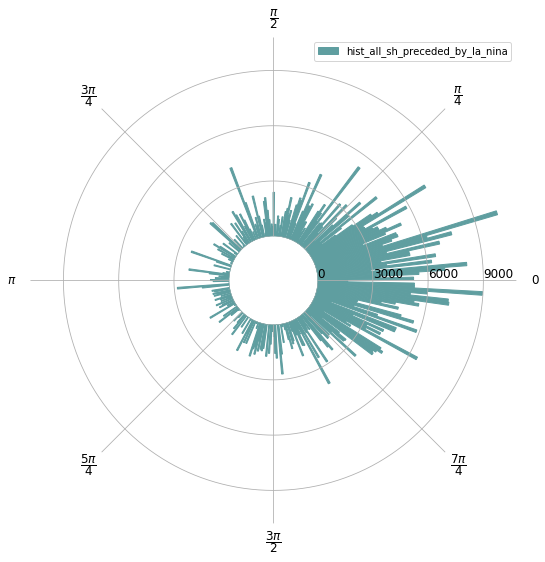

In [27]:
# All SH Eruptions preceded by La Nina conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5: # La Nina in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_sh_preceded_by_la_nina')

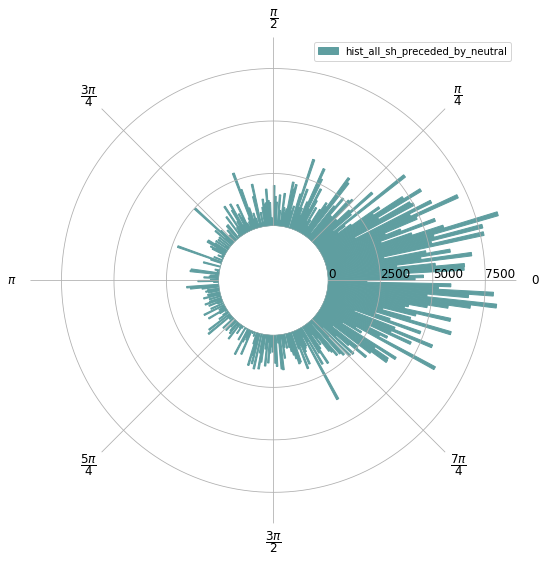

In [28]:
# All SH Eruptions preceded by Neutral conditions
N=10000
win = 60 # window = 5 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))

volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    if volc_source[volc_year] != 3.0 : # Tropical Eruptions only
        continue
    #if volc[volc_year] < 3.7 : # Large Volcanic eruptions
    #    continue
    if (np.mean(nino3[rand_year[0]-6:rand_year[0]]) > -0.5) & (np.mean(nino3[rand_year[0]-6:rand_year[0]]) < 0.5): # Neutral in the previous year
        continue 
    delphi_hist_window = delphi_hist_wrap[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = delphi_hist_window
    i = i + 1

delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
polar_plot(delphi_hist_dist_2, 'hist_all_sh_preceded_by_neutral')